In [1]:
import pandas as pd 
import numpy as np

## 1. Przetwarzanie danych 
1. Wczytaj plik do pandas DataFrame
2. Zapisz do zmiennych dane z chwili czasowej dla danego połącznia (4 razem)
.Pary węzłów: (5,8), (8,5), (5,12), (8,12)
3. Potwórz operacje dla wszystkich plików
4. Zapisz wygenerowane `dataFrame`s do plików csv 

In [3]:
# %pip install gdown
# !gdown https://drive.google.com/uc?id=1lhA5es8rJn4siluQc1qfiWNq2vDVMR1e

Downloading...
From: https://drive.google.com/uc?id=1lhA5es8rJn4siluQc1qfiWNq2vDVMR1e
To: /home/bart/AI3/Traffic/NetworksTimeSeries/traffic.zip
100%|███████████████████████████████████████| 65.0M/65.0M [02:56<00:00, 368kB/s]


In [ ]:
# !unzip traffic.zip

In [47]:
file_names = []
for dirpath, dirnames, file in os.walk("./traffic"):
    file_names.append(file)

In [48]:
file_names = file_names[0]
file_names

['15082.txt',
 '13290.txt',
 '14298.txt',
 '14056.txt',
 '2814.txt',
 '18821.txt',
 '2230.txt',
 '9444.txt',
 '10284.txt',
 '13828.txt',
 '17069.txt',
 '8745.txt',
 '13718.txt',
 '16064.txt',
 '15434.txt',
 '6000.txt',
 '11162.txt',
 '18307.txt',
 '4227.txt',
 '436.txt',
 '8479.txt',
 '222.txt',
 '10664.txt',
 '9028.txt',
 '11764.txt',
 '18044.txt',
 '6836.txt',
 '15752.txt',
 '6313.txt',
 '18205.txt',
 '10905.txt',
 '16686.txt',
 '16618.txt',
 '1001.txt',
 '17502.txt',
 '1886.txt',
 '10962.txt',
 '9298.txt',
 '13647.txt',
 '19160.txt',
 '8885.txt',
 '9866.txt',
 '15967.txt',
 '16158.txt',
 '13274.txt',
 '976.txt',
 '14237.txt',
 '7121.txt',
 '13875.txt',
 '16080.txt',
 '8303.txt',
 '3915.txt',
 '11218.txt',
 '881.txt',
 '13503.txt',
 '19055.txt',
 '8010.txt',
 '8416.txt',
 '5130.txt',
 '7267.txt',
 '2541.txt',
 '19068.txt',
 '19128.txt',
 '13334.txt',
 '12437.txt',
 '11476.txt',
 '15537.txt',
 '1113.txt',
 '836.txt',
 '13945.txt',
 '8752.txt',
 '18936.txt',
 '10253.txt',
 '9630.txt',


In [53]:
n_samples = 20000

In [42]:
#single time unit
param = 4
single_df = pd.read_csv(f"./traffic/{param}.txt", delimiter=" ", header=None)
single_df

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,0.000000,351.709000,198.506000,281.411000,88.241400,402.596000,86.717700,178.74800,507.561000,55.088300,...,95.028000,241.01600,10.736100,24.126600,57.467400,351.09800,50.081200,17.413900,12.799600,NaN
1,561.214000,0.000000,361.816000,452.912000,124.762000,299.742000,102.008000,6.57817,619.179000,224.933000,...,9.042530,9.96068,48.399900,53.947400,36.130000,278.82300,83.510800,2.652550,47.404300,NaN
2,204.167000,260.181000,0.000000,30.380000,44.563200,26.274900,16.304900,119.53300,190.346000,0.370499,...,22.249400,4.56907,0.014908,9.868200,11.767300,26.97820,18.776000,8.558550,5.485890,NaN
3,294.874000,318.542000,75.555600,0.000000,1.254070,330.663000,14.749900,27.50830,544.492000,3.317730,...,47.727500,365.95700,7.539000,3.580090,19.612600,316.86300,41.386900,2.344910,32.639000,NaN
4,184.405000,530.661000,185.420000,156.811000,0.000000,311.013000,66.593300,2.51654,312.422000,0.311775,...,7.789250,37.30180,44.630200,42.821800,55.162000,65.93750,12.611900,44.908300,2.921720,NaN
5,408.127000,511.323000,10.484400,340.244000,1007.290000,0.000000,958.491000,200.98800,312.181000,512.989000,...,14.533500,11.08610,1.500400,14.782200,15.309800,284.53700,20.204400,8.065230,0.010159,NaN
6,3.362850,415.478000,124.933000,163.829000,61.295700,347.303000,0.000000,295.67000,920.558000,16.015200,...,83.474300,125.37400,3.244070,59.347200,71.171800,22.42130,61.981000,59.391000,68.581900,NaN
7,301.882000,278.090000,94.461300,88.090400,0.701610,34.860600,162.301000,0.00000,6.401330,204.263000,...,79.641700,162.94100,66.393500,11.434800,88.409200,1.43066,197.412000,91.989900,56.757400,NaN
8,540.823000,353.890000,465.465000,294.029000,112.594000,348.669000,1225.280000,87.36030,0.000000,4.891550,...,5.331640,100.11600,57.306800,0.013084,90.879100,344.88800,75.361000,56.471100,99.444300,NaN
9,50.235300,238.269000,14.980400,101.743000,300.255000,12.369000,132.249000,168.15900,308.998000,0.000000,...,53.963900,62.40300,8.412000,54.516400,60.082300,1.48845,24.453300,47.439800,12.150500,NaN


In [51]:
data_I = single_df.iloc[4][7]
data_II = single_df.iloc[7][4]
data_III = single_df.iloc[4][11]
data_IV = single_df.iloc[7][11]

In [40]:
data_I

2.15742

In [54]:
data_set_I = np.zeros(n_samples)
data_set_II = np.zeros(n_samples)
data_set_III = np.zeros(n_samples)
data_set_IV = np.zeros(n_samples)

for i in range(n_samples):
    single_df = pd.read_csv(f"./traffic/{i}.txt", delimiter=" ", header=None)
    data_set_I[i] = single_df.iloc[4][7]
    data_set_II[i] = single_df.iloc[7][4]
    data_set_III[i] = single_df.iloc[4][11]
    data_set_IV[i] = single_df.iloc[7][11]

In [55]:
len(data_set_I)

20000

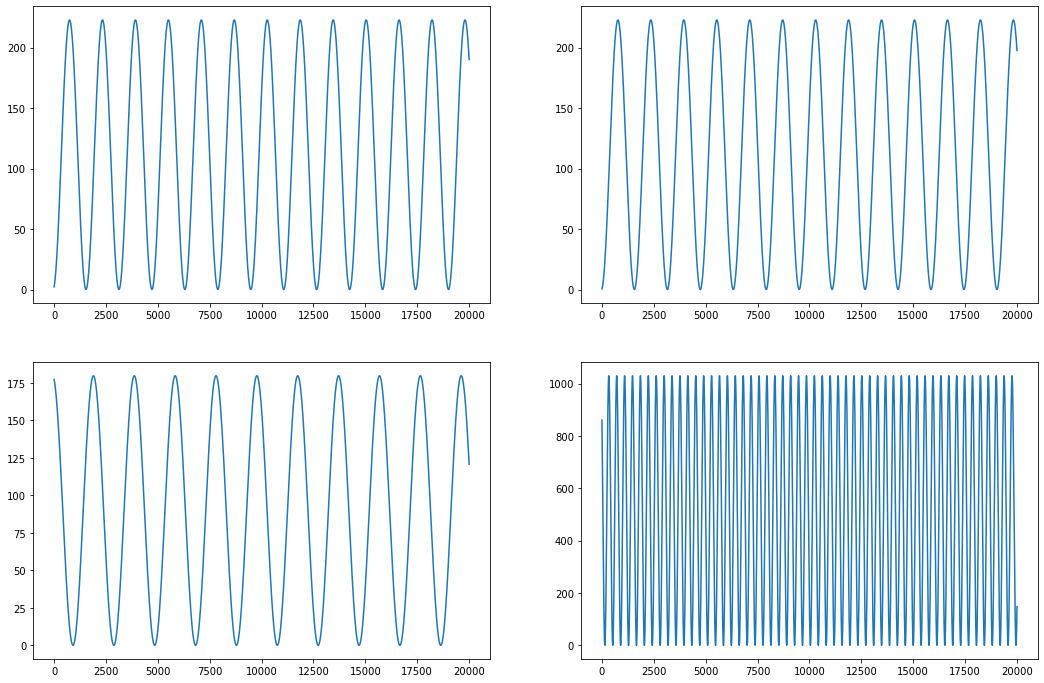

In [62]:
import matplotlib.pyplot as plt 
x = np.arange(len(data_set_I))

fig, ax = plt.subplots(figsize=(18, 12), nrows=2, ncols=2)
ax[0,0].plot(x, data_set_I)
ax[0,1].plot(x, data_set_II)
ax[1,0].plot(x, data_set_III)
ax[1,1].plot(x, data_set_IV)
plt.show()

In [63]:
np.save("./datasets/dataset_5_8", data_set_I)
np.save("./datasets/dataset_8_5", data_set_II)
np.save("./datasets/dataset_5_12", data_set_III)
np.save("./datasets/dataset_8_12", data_set_IV)